In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaledData = StandardScaler().fit_transform(df_market_data)

In [6]:
# Create a DataFrame with the scaled data
scaled_data_DF = pd.DataFrame(
    scaledData,
    columns=df_market_data.columns
)

# Copy the crypto names from the original data
scaled_data_DF["coin_id"] = df_market_data.index
# Set the coinid column as index
scaled_data_DF = scaled_data_DF.set_index("coin_id")

# Display sample data
scaled_data_DF.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
kValues = list(range(1,11))

In [8]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for k in kValues:
    kModel = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kModel.fit(scaled_data_DF)
    inertia_values.append(kModel.inertia_)

inertia_values[:5]


[287.0,
 198.57181809798124,
 145.63574772192865,
 79.02243535120975,
 66.21778006000338]

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbowData = {
    "k": kValues,
    "inertia": inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_DF = pd.DataFrame(elbowData)
elbow_DF.head()

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780


In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
hvplot.extension("bokeh")
elbowPlot = elbow_DF.hvplot.line(
    x= "k",
    y = "inertia",
    title = "Elbow Curve",
    xticks=kValues
)

elbowPlot

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** As the K increases from 1-4 the value of the inertia decreases. After finding the point in which the inertia drop doesn't have a significant steep is at 4. The best value of k is 4. Where we can see a stoppage of steep decline moving in a more consistant gradual rate.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=42)

In [12]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_data_DF)

KMeans(n_clusters=4, random_state=42)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = kmeans.predict(scaled_data_DF)

# Print the resulting array of cluster values.
print(predicted_clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [14]:
# Create a copy of the DataFrame
scaled_copy_DF = scaled_data_DF.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters
scaled_copy_DF['predicted_cluster'] = predicted_clusters

# Display sample data
scaled_copy_DF

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


In [16]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scaled_copy_DF['coin_id'] = scaled_copy_DF.index

scatter_plot = scaled_copy_DF.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    by="predicted_cluster",  # Color points by predicted cluster
    hover_cols=["coin_id"],   # Show cryptocurrency name on hover
    title="Cryptocurrency Price Changes (24h vs 7d)",
    width=800,               # Set plot width
    height=400               # Set plot height
)

# Display the plot
scatter_plot

:NdOverlay   [predicted_cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_components = pca.fit_transform(scaled_copy_DF.drop(columns=['predicted_cluster', 'coin_id']))

df_pca_scaled = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'], index=scaled_copy_DF.index)

# View the first five rows of the DataFrame. 
df_pca_scaled.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [19]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [20]:
pca_variance = pca.explained_variance_ratio_
pca_variance.sum()

0.8950316570309841

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the theree principal components, as shown in your results, is 0.895.

In [21]:
# Create a new DataFrame with the PCA data.
pca_scaled_DF = pd.DataFrame(pca_components, columns=['PC1', 'PC2', 'PC3'])

In [22]:
# Copy the crypto names from the original data
pca_scaled_DF['coin_id'] = scaled_copy_DF.index

# Set the coinid column as index
pca_scaled_DF.set_index('coin_id', inplace=True)

# Display sample data
print(pca_scaled_DF.head(10))

                      PC1       PC2       PC3
coin_id                                      
bitcoin         -0.600667  0.842760  0.461595
ethereum        -0.458261  0.458466  0.952877
tether          -0.433070 -0.168126 -0.641752
ripple          -0.471835 -0.222660 -0.479053
bitcoin-cash    -1.157800  2.041209  1.859715
binancecoin     -0.516534  1.388377  0.804071
chainlink       -0.450711  0.517699  2.846143
cardano         -0.345600  0.729439  1.478013
litecoin        -0.649468  0.432165  0.600303
bitcoin-cash-sv -0.759014 -0.201200 -0.217653


---

### Find the Best Value for k Using the PCA Data

In [23]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [24]:
# Create an empty list to store the inertia values
inertia_values_New = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_scaled_DF) 
    inertia_values_New.append(kmeans.inertia_)
print(inertia_values_New)

[256.8740855678925, 182.33953007775648, 140.4318329840837, 49.665496651797355, 42.05190109791725, 31.74900524438901, 28.03186917255275, 19.451747206041347, 13.814081971558094, 10.630647573870965, 10.120242629957758]


In [25]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': list(range(1, 12)),  # k values from 1 to 11
    'inertia': inertia_values_New  # Inertia values from the previous loop
}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df_new = pd.DataFrame(elbow_data)

elbow_df_new.head()

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901


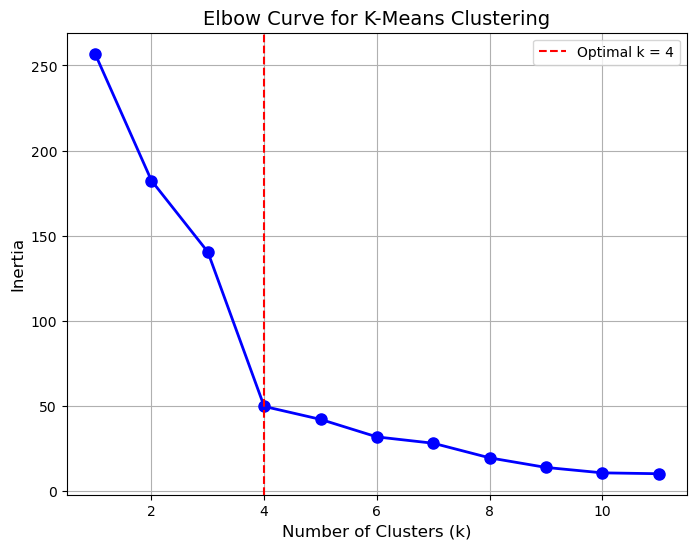

In [26]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plotting the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(elbow_df_new['k'], elbow_df_new['inertia'], marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

# Adding titles and labels
plt.title('Elbow Curve for K-Means Clustering', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)

# Highlight the elbow (optional)
plt.axvline(x=4, color='r', linestyle='--', label='Optimal k = 4')  # This is an example, adjust based on your plot

# Display grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best K value is still 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No it does not differ from the previous original data. This can indicate that the data structures in terms of clusters does not make a significant change when you alter the data that much.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [28]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=42)

In [29]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(scaled_data_DF)

KMeans(n_clusters=4, random_state=42)

In [31]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters = kmeans_model.predict(scaled_data_DF)
# Print the resulting array of cluster values.
print(predicted_clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [32]:
# Create a copy of the DataFrame with the PCA data
market_data_pca_copy = scaled_data_DF.copy()

# Add a new column to the DataFrame with the predicted clusters
market_data_pca_copy['Cluster'] = predicted_clusters

# Display sample data


In [33]:
print(market_data_pca_copy.columns.tolist())

['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y', 'Cluster']


In [34]:
market_data_pca_copy.columns = market_data_pca_copy.columns.str.strip()
market_data_pca_copy.columns = market_data_pca_copy.columns.str.replace(' ', '_')  # Optional: replaces spaces with underscores

In [35]:
print(market_data_pca_copy.columns.tolist())

['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y', 'Cluster']


In [37]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
# Make sure your DataFrame has cluster labels
hvplot.extension('bokeh')
cluster_plot = market_data_pca_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',
    hover_cols=['coin_id'],
    marker = ['triangle', 'hex', 'cros', 'square'],
    title='Crypto Clusters')

cluster_plot 

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['PC1', 'PC2']

PandasInterface expects tabular data, for more information on supported datatypes see https://holoviews.org/user_guide/Tabular_Datasets.html

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [30]:
# Composite plot to contrast the Elbow curves

In [31]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 